In [95]:
import pandas as pd
import numpy as np

df = pd.read_csv('allMetrics.csv', sep=',')
df

,VM,Metric,Value,Unit,Timestamp,Date,Time
0,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.75,%,28.11.25 09:30:00,2025-11-28,09:30
1,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.75,%,28.11.25 09:00:00,2025-11-28,09:00
2,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.76,%,28.11.25 08:30:00,2025-11-28,08:30
3,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.75,%,28.11.25 08:00:00,2025-11-28,08:00
4,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.74,%,28.11.25 07:30:00,2025-11-28,07:30
...,...,...,...,...,...,...,...
6662,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,sys.uptime.latest,73824.00,second,21.11.25 13:00:00,2025-11-21,13:00
6663,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,sys.uptime.latest,72024.00,second,21.11.25 12:30:00,2025-11-21,12:30
6664,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,sys.uptime.latest,70224.00,second,21.11.25 12:00:00,2025-11-21,12:00
6665,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,sys.uptime.latest,68424.00,second,21.11.25 11:30:00,2025-11-21,11:30


# EDA

In [96]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\kavakosova_e\AppData\Local\Temp\ipykernel_31176\766710655.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [97]:
all_metrics = df['Metric'].unique()
all_metrics

array(['cpu.usage.average', 'cpu.usagemhz.average', 'cpu.ready.summation',
       'mem.consumed.average', 'mem.overhead.average',
       'mem.swapinrate.average', 'mem.swapoutrate.average',
       'mem.usage.average', 'mem.vmmemctl.average',
       'disk.maxtotallatency.latest', 'disk.provisioned.latest',
       'disk.unshared.latest', 'disk.usage.average', 'disk.used.latest',
       'net.usage.average', 'sys.uptime.latest'], dtype=object)

Порисуем графики

In [87]:
df_metric = df[df['Metric']=='cpu.usage.average']
df_metric

,VM,Metric,Value,Unit,Timestamp,Date,Time,hour,day_of_week,is_weekend,time_of_day
0,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.75,%,2025-11-28 09:30:00,2025-11-28,09:30,9,4,False,morning
1,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.75,%,2025-11-28 09:00:00,2025-11-28,09:00,9,4,False,morning
2,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.76,%,2025-11-28 08:30:00,2025-11-28,08:30,8,4,False,morning
3,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.75,%,2025-11-28 08:00:00,2025-11-28,08:00,8,4,False,morning
4,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.74,%,2025-11-28 07:30:00,2025-11-28,07:30,7,4,False,morning
...,...,...,...,...,...,...,...,...,...,...,...
328,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.81,%,2025-11-21 13:00:00,2025-11-21,13:00,13,4,False,afternoon
329,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.79,%,2025-11-21 12:30:00,2025-11-21,12:30,12,4,False,morning
330,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.76,%,2025-11-21 12:00:00,2025-11-21,12:00,12,4,False,morning
331,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.90,%,2025-11-21 11:30:00,2025-11-21,11:30,11,4,False,morning


In [23]:
df_metric = df_metric.sort_values(by='Timestamp', ascending=True)

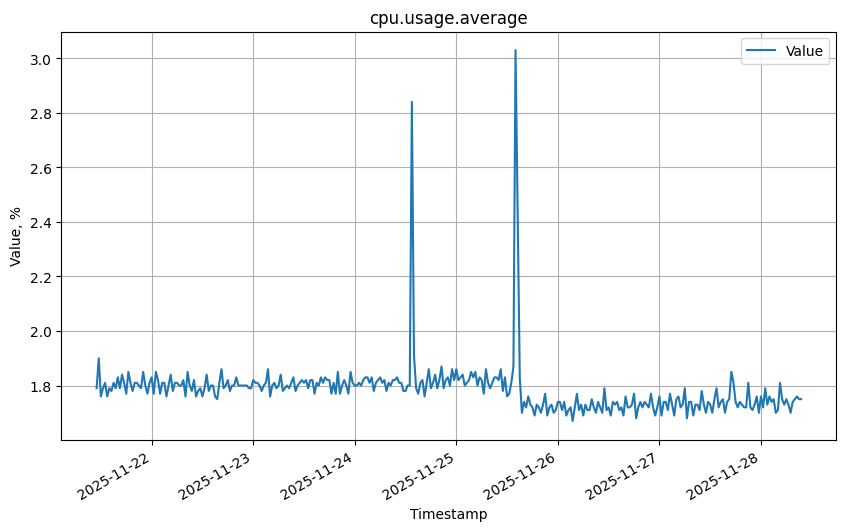

In [18]:
import matplotlib.pyplot as plt

df_metric.plot(x='Timestamp', y='Value', kind='line', figsize=(10, 6))

plt.xlabel('Timestamp')
plt.ylabel('Value, %')
plt.title('cpu.usage.average')
plt.grid(True)

plt.show()

In [34]:
def plot_metric(metric):
    df_metric = df[df['Metric']==metric]
    df_metric = df_metric.sort_values(by='Timestamp', ascending=True)
    unit = df_metric['Unit'].iloc[0]
    
    df_metric.plot(x='Timestamp', y='Value', kind='line', figsize=(10, 6))

    plt.xlabel('Timestamp')
    plt.ylabel(f'Value, {unit}')
    plt.title(f'{metric}')
    plt.grid(True)
    
    plt.show()

cpu.usage.average


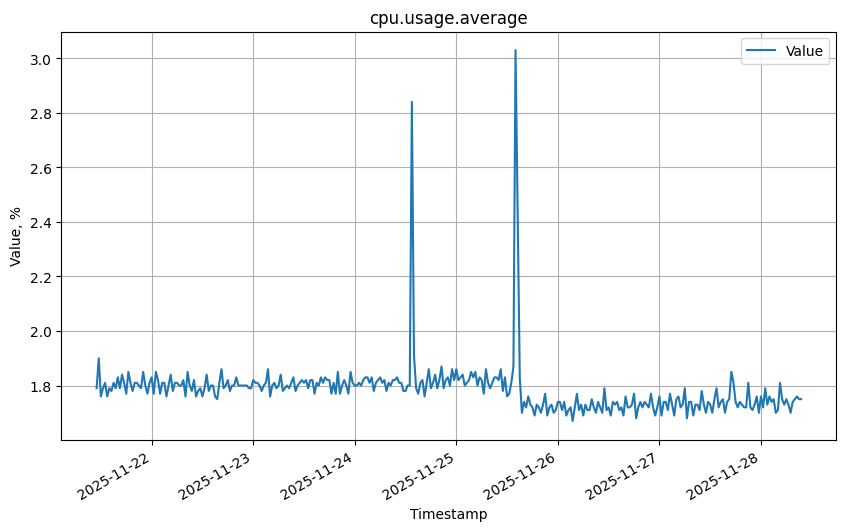

cpu.usagemhz.average


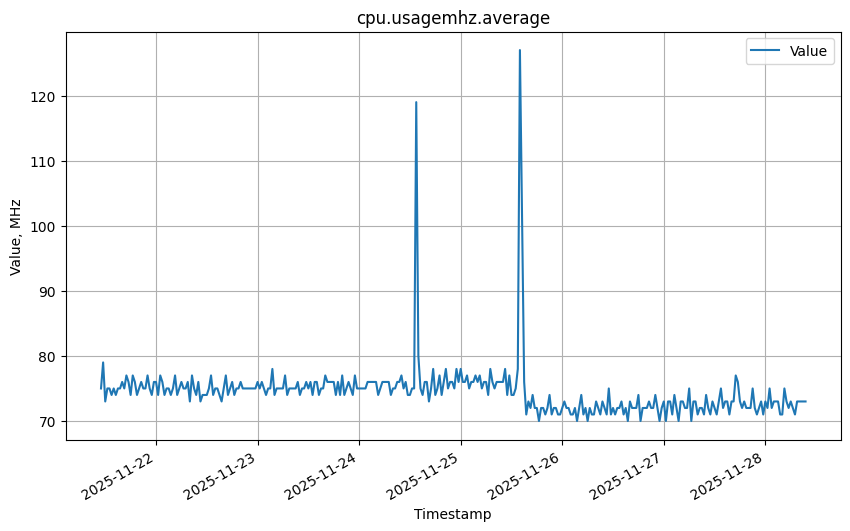

cpu.ready.summation


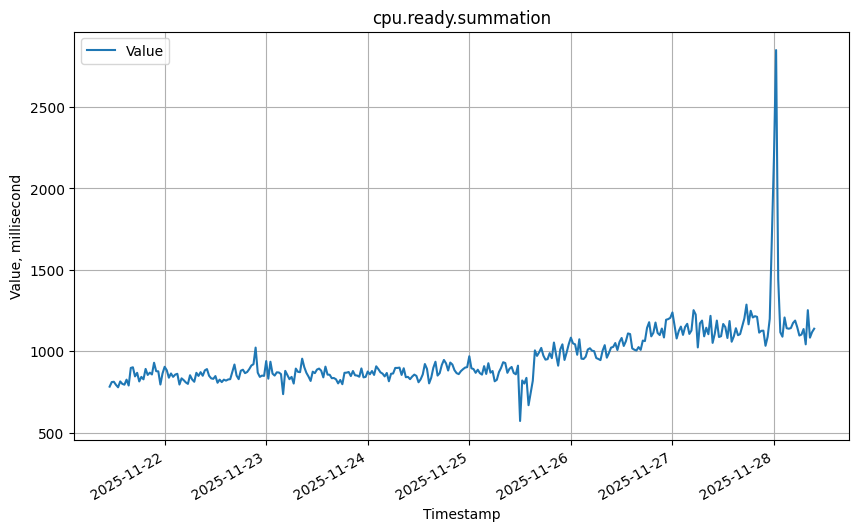

mem.consumed.average


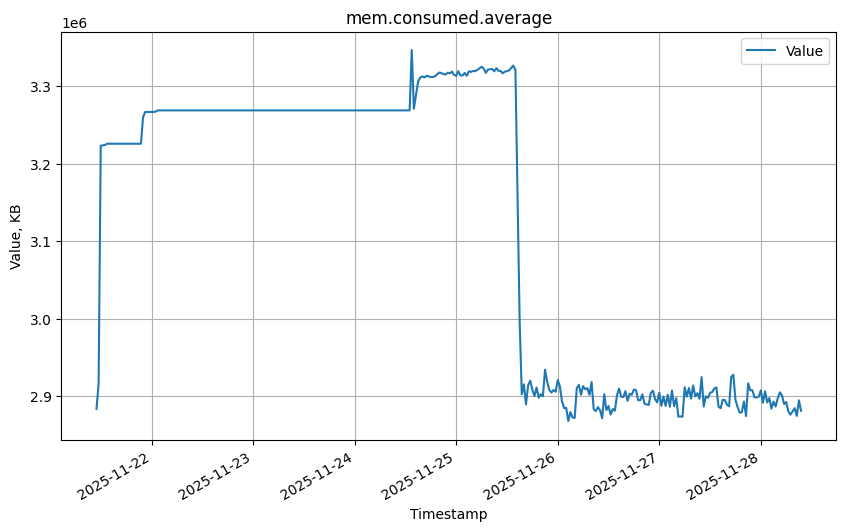

mem.overhead.average


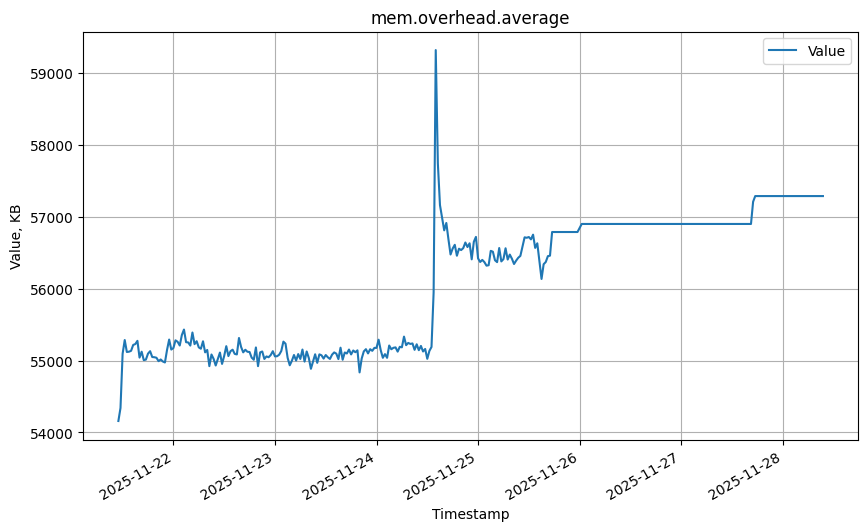

mem.swapinrate.average


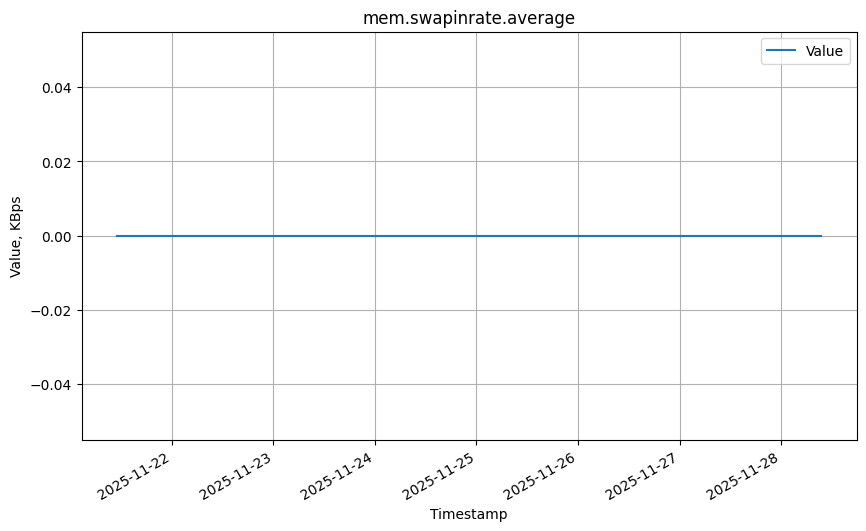

mem.swapoutrate.average


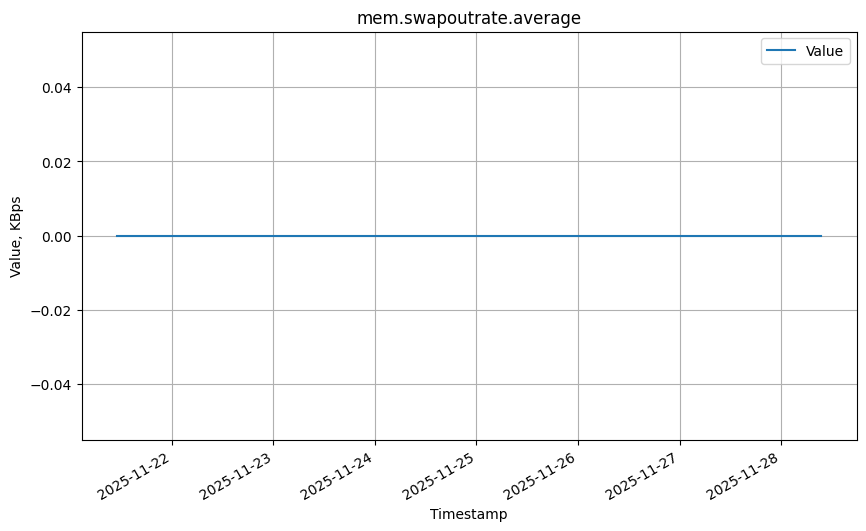

mem.usage.average


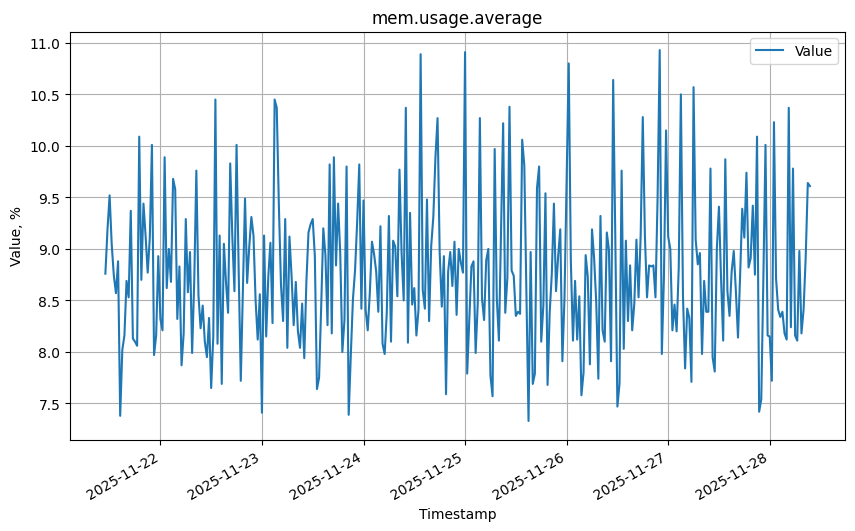

mem.vmmemctl.average


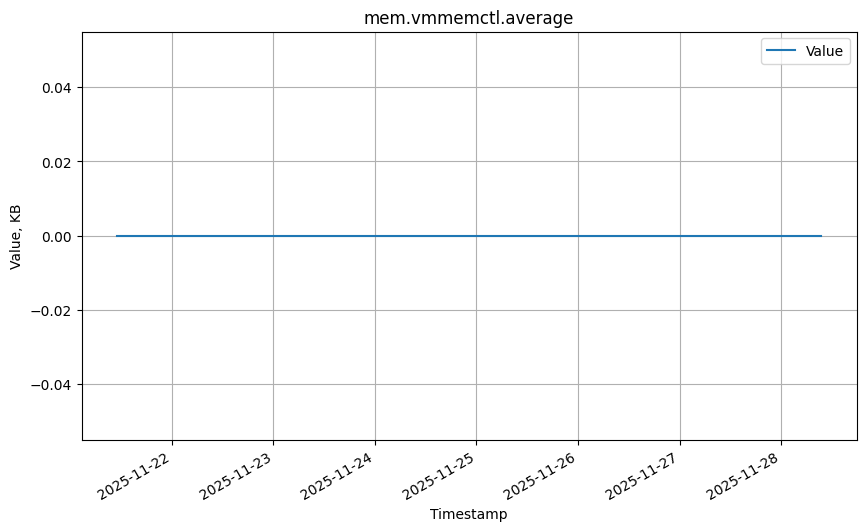

disk.maxtotallatency.latest


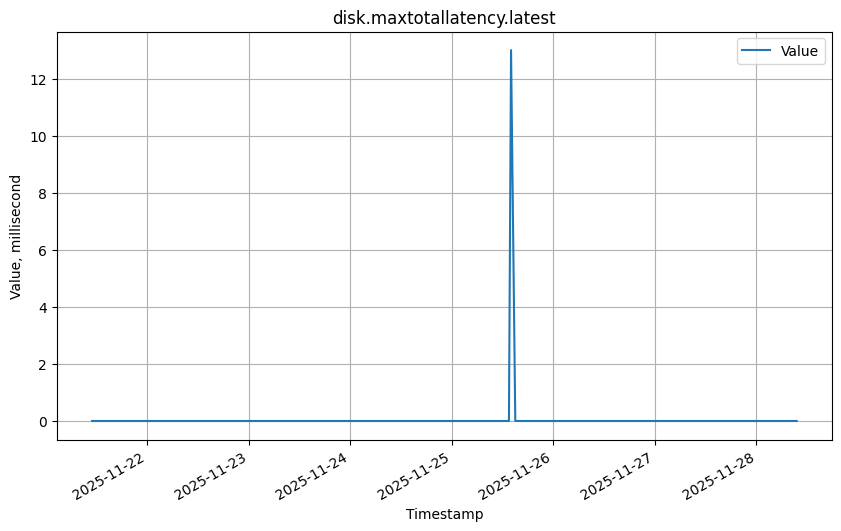

disk.provisioned.latest


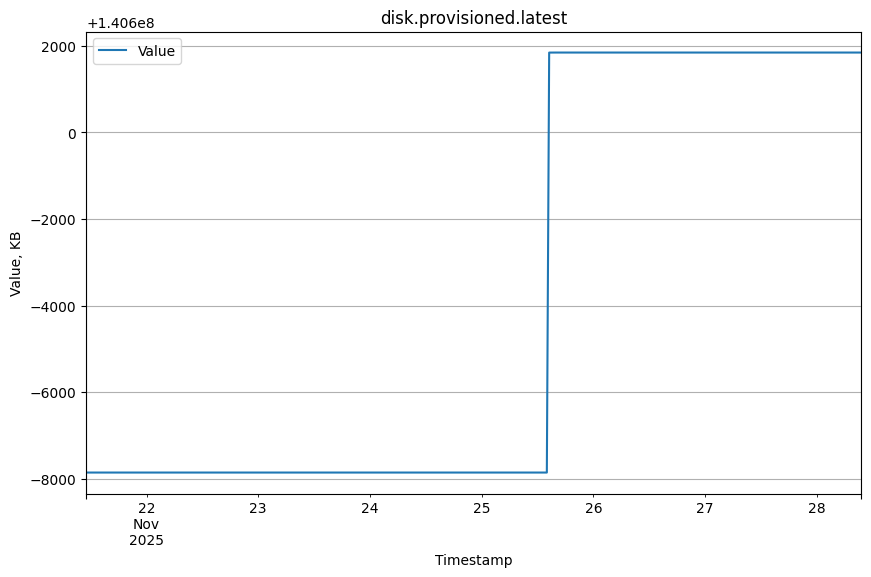

disk.unshared.latest


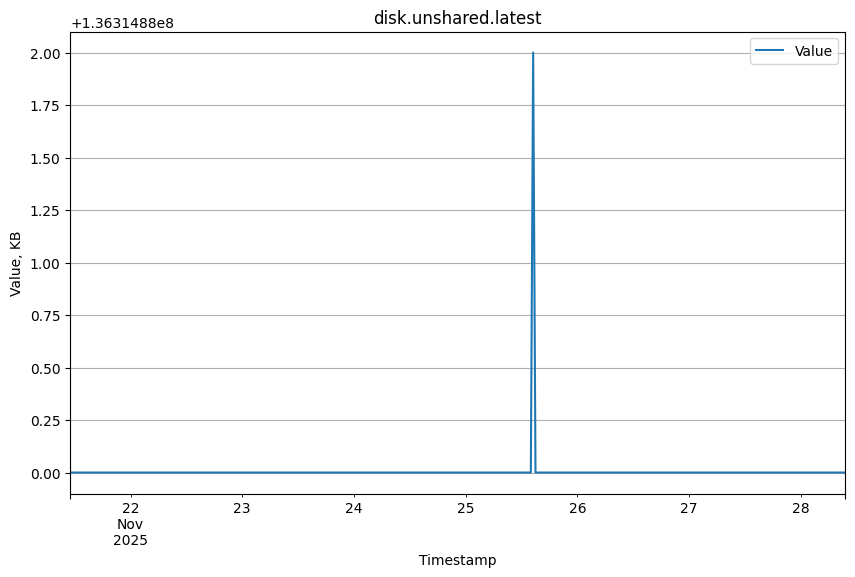

disk.usage.average


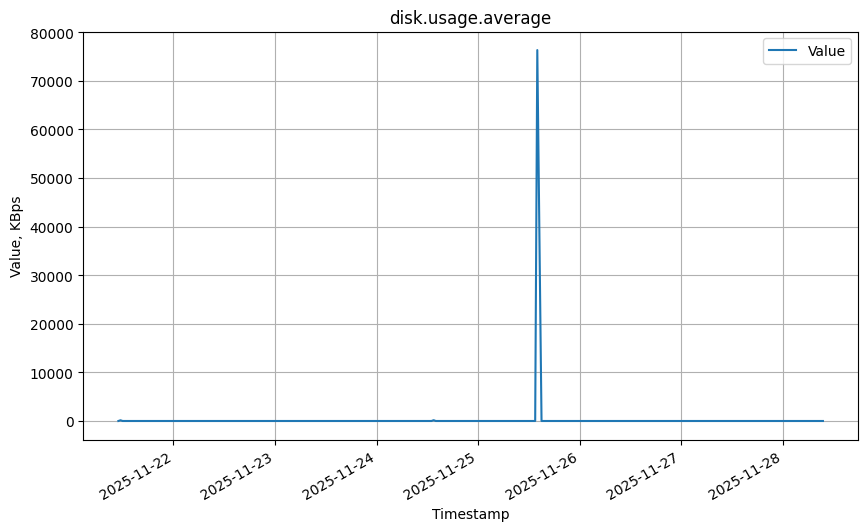

disk.used.latest


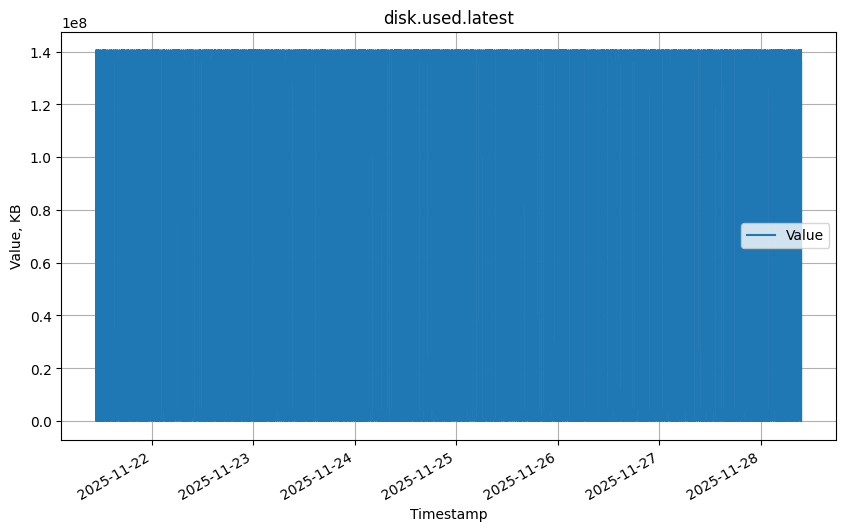

net.usage.average


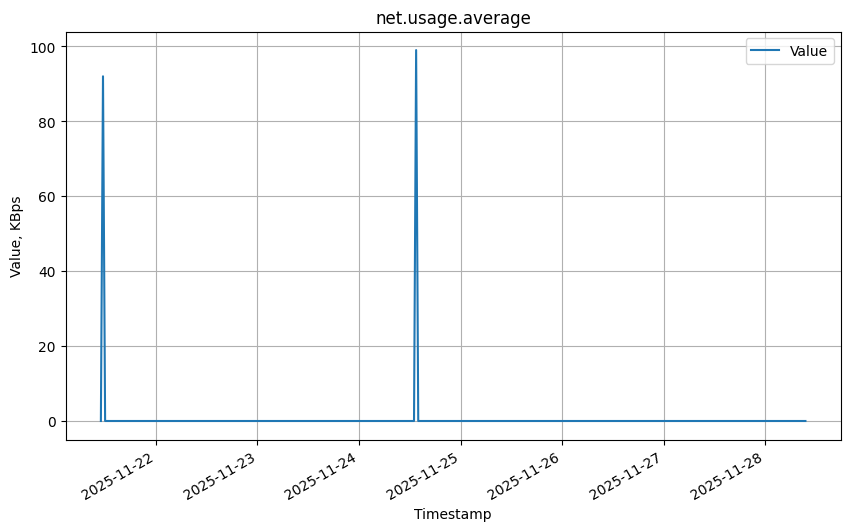

sys.uptime.latest


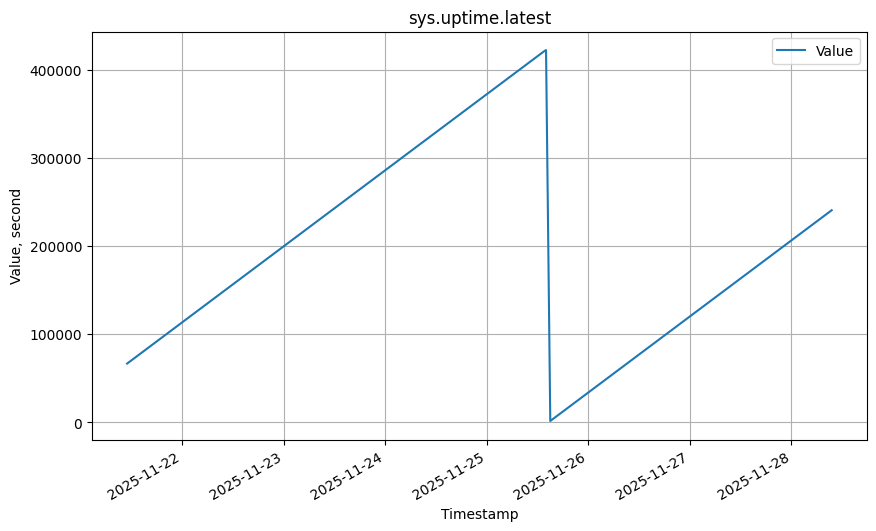

In [88]:
for metric in all_metrics:
    plot_metric(metric)

In [36]:
all_metrics

array(['cpu.usage.average', 'cpu.usagemhz.average', 'cpu.ready.summation',
       'mem.consumed.average', 'mem.overhead.average',
       'mem.swapinrate.average', 'mem.swapoutrate.average',
       'mem.usage.average', 'mem.vmmemctl.average',
       'disk.maxtotallatency.latest', 'disk.provisioned.latest',
       'disk.unshared.latest', 'disk.usage.average', 'disk.used.latest',
       'net.usage.average', 'sys.uptime.latest'], dtype=object)

In [69]:
units_dict = {
    'cpu.usage.average' : '%',
    'cpu.usagemhz.average': 'MHz',
    'cpu.ready.summation': 'millisecond',
    'mem.consumed.average': 'KB',
    'mem.overhead.average': 'KB',
    'mem.swapinrate.average': 'KBps',
    'mem.swapoutrate.average': 'KBps',
    'mem.usage.average': '%',
    'mem.vmmemctl.average': 'KB',
    'disk.maxtotallatency.latest': 'millisecond',
    'disk.provisioned.latest': 'KB',
    'disk.unshared.latest': 'KB',
    'disk.usage.average': 'KBps',
    'disk.used.latest': 'KB',
    'net.usage.average': 'KBps',
    'sys.uptime.latest': 'second'
}

Идейно: добавить производных признаков:
скользящие средние, пиковые значения, дельты

In [57]:
# Группируем по VM и Timestamp, затем pivot по метрике
df_wide = df.pivot_table(
    index=['VM', 'Timestamp'],
    columns='Metric',
    values='Value',
    aggfunc='first'  # на случай дублей
).reset_index()

# Сортируем по времени
df_wide = df_wide.sort_values(['VM', 'Timestamp']).reset_index(drop=True)

df_wide

Metric,VM,Timestamp,cpu.ready.summation,cpu.usage.average,cpu.usagemhz.average,disk.maxtotallatency.latest,disk.provisioned.latest,disk.unshared.latest,disk.usage.average,disk.used.latest,mem.consumed.average,mem.overhead.average,mem.swapinrate.average,mem.swapoutrate.average,mem.usage.average,mem.vmmemctl.average,net.usage.average,sys.uptime.latest
0,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 11:00:00,782.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,2883584.0,54159.0,0.0,0.0,8.76,0.0,0.0,66624.0
1,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 11:30:00,810.0,1.90,79.0,0.0,140592143.0,136314880.0,150.0,140592141.0,2915829.0,54340.0,0.0,0.0,9.19,0.0,92.0,68424.0
2,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 12:00:00,812.0,1.76,73.0,0.0,140592143.0,136314880.0,3.0,140592141.0,3222983.0,55094.0,0.0,0.0,9.52,0.0,0.0,70224.0
3,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 12:30:00,793.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,3223551.0,55285.0,0.0,0.0,9.04,0.0,0.0,72024.0
4,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 13:00:00,778.0,1.81,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,3223939.0,55119.0,0.0,0.0,8.74,0.0,0.0,73824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 07:30:00,1042.0,1.74,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,2880326.0,57288.0,0.0,0.0,8.18,0.0,0.0,233604.0
330,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 08:00:00,1252.0,1.75,73.0,0.0,140601844.0,136314880.0,2.0,140601842.0,2884527.0,57288.0,0.0,0.0,8.41,0.0,0.0,235404.0
331,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 08:30:00,1083.0,1.76,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,2874485.0,57288.0,0.0,0.0,8.92,0.0,0.0,237204.0
332,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 09:00:00,1117.0,1.75,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,2894621.0,57288.0,0.0,0.0,9.64,0.0,0.0,239004.0


In [58]:
df_wide.columns

Index(['VM', 'Timestamp', 'cpu.ready.summation', 'cpu.usage.average',
       'cpu.usagemhz.average', 'disk.maxtotallatency.latest',
       'disk.provisioned.latest', 'disk.unshared.latest', 'disk.usage.average',
       'disk.used.latest', 'mem.consumed.average', 'mem.overhead.average',
       'mem.swapinrate.average', 'mem.swapoutrate.average',
       'mem.usage.average', 'mem.vmmemctl.average', 'net.usage.average',
       'sys.uptime.latest'],
      dtype='object', name='Metric')

### Временные признаки

In [61]:
df_wide['hour'] = df_wide['Timestamp'].dt.hour
df_wide['day_of_week'] = df_wide['Timestamp'].dt.dayofweek
df_wide['is_weekend'] = df_wide['day_of_week']>=5
df_wide['time_of_day'] = pd.cut(df_wide['hour'], bins=[0, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'])

In [62]:
df_wide

Metric,VM,Timestamp,cpu.ready.summation,cpu.usage.average,cpu.usagemhz.average,disk.maxtotallatency.latest,disk.provisioned.latest,disk.unshared.latest,disk.usage.average,disk.used.latest,...,mem.swapinrate.average,mem.swapoutrate.average,mem.usage.average,mem.vmmemctl.average,net.usage.average,sys.uptime.latest,hour,day_of_week,is_weekend,time_of_day
0,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 11:00:00,782.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,...,0.0,0.0,8.76,0.0,0.0,66624.0,11,4,False,morning
1,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 11:30:00,810.0,1.90,79.0,0.0,140592143.0,136314880.0,150.0,140592141.0,...,0.0,0.0,9.19,0.0,92.0,68424.0,11,4,False,morning
2,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 12:00:00,812.0,1.76,73.0,0.0,140592143.0,136314880.0,3.0,140592141.0,...,0.0,0.0,9.52,0.0,0.0,70224.0,12,4,False,morning
3,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 12:30:00,793.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,...,0.0,0.0,9.04,0.0,0.0,72024.0,12,4,False,morning
4,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 13:00:00,778.0,1.81,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,...,0.0,0.0,8.74,0.0,0.0,73824.0,13,4,False,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 07:30:00,1042.0,1.74,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,...,0.0,0.0,8.18,0.0,0.0,233604.0,7,4,False,morning
330,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 08:00:00,1252.0,1.75,73.0,0.0,140601844.0,136314880.0,2.0,140601842.0,...,0.0,0.0,8.41,0.0,0.0,235404.0,8,4,False,morning
331,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 08:30:00,1083.0,1.76,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,...,0.0,0.0,8.92,0.0,0.0,237204.0,8,4,False,morning
332,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 09:00:00,1117.0,1.75,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,...,0.0,0.0,9.64,0.0,0.0,239004.0,9,4,False,morning


Лаги и скользящие статистики (окна: 2ч, 4ч, 12ч, 24ч):

In [63]:
metrics = all_metrics

In [65]:
from tqdm import tqdm

windows = [4, 8, 24, 48]

for metric in tqdm(metrics):
    # Лаги
    for lag in [1, 2, 3, 4, 8, 12, 24]:
        df_wide[f'{metric}_lag_{lag}']  = df_wide[metric].shift(lag)

        # Скользящие статистики
        for window in windows:
            df_wide[f'{metric}_rolling_mean_{window}'] = df_wide[metric].rolling(window).mean()
            df_wide[f'{metric}_rolling_std_{window}'] = df_wide[metric].rolling(window).std()
            df_wide[f'{metric}_rolling_min_{window}'] = df_wide[metric].rolling(window).min()
            df_wide[f'{metric}_rolling_max_{window}'] = df_wide[metric].rolling(window).max()
            df_wide[f'{metric}_rolling_range_{window}'] = df_wide[f'{metric}_rolling_max_{window}'] - df_wide[f'{metric}_rolling_min_{window}']

        # Изменения
        df_wide[f'{metric}_diff_1'] = df_wide[metric].diff(1)
        df_wide[f'{metric}_pct_change_1'] = df_wide[metric].pct_change(1)

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]C:\Users\kavakosova_e\AppData\Local\Temp\ipykernel_31176\96561878.py:20: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_wide[f'{metric}_pct_change_1'] = df_wide[metric].pct_change(1)
100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 41.91it/s]


In [67]:
df_wide.to_excel('Лаги_и_скользящие_статистики.xlsx')

### Интерактивные признаки

In [68]:
# Флаги активности, подобрать параметры
df_wide['is_cpu_low'] = df_wide['cpu.usage.average'] < 1.8
df_wide['is_ram_low'] = df_wide['mem.usage.average'] < 9
df_wide['is_net_idle'] = df_wide['net.usage.average'] == 0
df_wide['is_disk_idle'] = df_wide['disk.usage.average'] < 5

C:\Users\kavakosova_e\AppData\Local\Temp\ipykernel_31176\1935322825.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_wide['is_cpu_low'] = df_wide['cpu.usage.average'] < 1.8
C:\Users\kavakosova_e\AppData\Local\Temp\ipykernel_31176\1935322825.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_wide['is_ram_low'] = df_wide['mem.usage.average'] < 9
C:\Users\kavakosova_e\AppData\Local\Temp\ipykernel_31176\1935322825.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

In [72]:
all_metrics

array(['cpu.usage.average', 'cpu.usagemhz.average', 'cpu.ready.summation',
       'mem.consumed.average', 'mem.overhead.average',
       'mem.swapinrate.average', 'mem.swapoutrate.average',
       'mem.usage.average', 'mem.vmmemctl.average',
       'disk.maxtotallatency.latest', 'disk.provisioned.latest',
       'disk.unshared.latest', 'disk.usage.average', 'disk.used.latest',
       'net.usage.average', 'sys.uptime.latest'], dtype=object)

In [77]:
# Нагрузочные коэффициенты

df_wide['cpu_mem_pressure'] = df_wide['cpu.usage.average'] * df_wide['mem.usage.average']
df_wide['io_pressure'] = df_wide['disk.usage.average'] * df_wide['disk.maxtotallatency.latest']

# Эффективность использования ресурсов
df_wide['cpu_efficieny'] = df_wide['cpu.usagemhz.average'] / (df_wide['cpu.usage.average'] + 1e-6)
# df_wide['memory_efficiency'] = df_wide['mem.consumed.average'] / (df_wide['mem.provisioned.latest'] + 1e-6)


# Признак "бутылочного горлышка"
df_wide['potential_bottleneck'] = (
    (df_wide['cpu.usage.average'] > 80).astype(int) +
    (df_wide['mem.usage.average'] > 85).astype(int) +
    (df_wide['disk.usage.average'] > 90).astype(int)
)

# Композитарные признаки нагрузки
df_wide['system_load_index'] = (
                                0.4 * df_wide['cpu.usage.average'] +
                                0.3 * df_wide['mem.usage.average'] +
                                0.2 * df_wide['disk.usage.average'] +
                                0.1 * df_wide['net.usage.average']
)

C:\Users\kavakosova_e\AppData\Local\Temp\ipykernel_31176\612460298.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_wide['system_load_index'] = (


In [78]:
df_wide

Metric,VM,Timestamp,cpu.ready.summation,cpu.usage.average,cpu.usagemhz.average,disk.maxtotallatency.latest,disk.provisioned.latest,disk.unshared.latest,disk.usage.average,disk.used.latest,...,sys.uptime.latest_lag_24,is_cpu_low,is_ram_low,is_net_idle,is_disk_idle,cpu_mem_pressure,io_pressure,cpu_efficieny,potential_bottleneck,system_load_index
0,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 11:00:00,782.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,...,NaN,True,True,True,True,15.6804,0.0,41.899418,0,3.944
1,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 11:30:00,810.0,1.90,79.0,0.0,140592143.0,136314880.0,150.0,140592141.0,...,NaN,False,False,False,False,17.4610,0.0,41.578925,1,42.717
2,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 12:00:00,812.0,1.76,73.0,0.0,140592143.0,136314880.0,3.0,140592141.0,...,NaN,True,False,True,True,16.7552,0.0,41.477249,0,4.160
3,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 12:30:00,793.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,...,NaN,True,False,True,True,16.1816,0.0,41.899418,0,4.028
4,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 13:00:00,778.0,1.81,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,...,NaN,False,True,True,True,15.8194,0.0,41.436441,0,3.946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 07:30:00,1042.0,1.74,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,...,190404.0,True,True,True,True,14.2332,0.0,41.953999,0,3.750
330,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 08:00:00,1252.0,1.75,73.0,0.0,140601844.0,136314880.0,2.0,140601842.0,...,192204.0,True,True,True,True,14.7175,0.0,41.714262,0,3.623
331,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 08:30:00,1083.0,1.76,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,...,194004.0,True,True,True,True,15.6992,0.0,41.477249,0,3.980
332,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 09:00:00,1117.0,1.75,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,...,195804.0,True,False,True,True,16.8700,0.0,41.714262,0,4.192


In [79]:
df_wide.to_excel('Лаги_скользящие_статистики_и_производные_признаки.xlsx')

In [82]:
features = df_wide.columns
features

Index(['VM', 'Timestamp', 'cpu.ready.summation', 'cpu.usage.average',
       'cpu.usagemhz.average', 'disk.maxtotallatency.latest',
       'disk.provisioned.latest', 'disk.unshared.latest', 'disk.usage.average',
       'disk.used.latest',
       ...
       'sys.uptime.latest_lag_24', 'is_cpu_low', 'is_ram_low', 'is_net_idle',
       'is_disk_idle', 'cpu_mem_pressure', 'io_pressure', 'cpu_efficieny',
       'potential_bottleneck', 'system_load_index'],
      dtype='object', name='Metric', length=495)

In [86]:
with open('columns.csv', 'w') as f:
    for feat in features:
        f.write(f'{feat}\n')

In [ ]:
# Отбор признаков
from sklearn.feature_selection import SelectKBest, mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression, k = 100)
X_selected = selector.fit_transform(X, y)

### Флаги активности

In [44]:
# Флаги активности, подобрать параметры

df_wide['is_cpu_low'] = df_wide['cpu.usage.average'] < 1.8
df_wide['is_ram_low'] = df_wide['mem.usage.average'] < 9
df_wide['is_net_idle'] = df_wide['net.usage.average'] == 0
df_wide['is_disk_idle'] = df_wide['disk.usage.average'] < 5

In [45]:
df_wide

Metric,VM,Timestamp,cpu.ready.summation,cpu.usage.average,cpu.usagemhz.average,disk.maxtotallatency.latest,disk.provisioned.latest,disk.unshared.latest,disk.usage.average,disk.used.latest,...,mem.swapinrate.average,mem.swapoutrate.average,mem.usage.average,mem.vmmemctl.average,net.usage.average,sys.uptime.latest,is_cpu_low,is_ram_low,is_net_idle,is_disk_idle
0,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 11:00:00,782.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,...,0.0,0.0,8.76,0.0,0.0,66624.0,True,True,True,True
1,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 11:30:00,810.0,1.90,79.0,0.0,140592143.0,136314880.0,150.0,140592141.0,...,0.0,0.0,9.19,0.0,92.0,68424.0,False,False,False,False
2,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 12:00:00,812.0,1.76,73.0,0.0,140592143.0,136314880.0,3.0,140592141.0,...,0.0,0.0,9.52,0.0,0.0,70224.0,True,False,True,True
3,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 12:30:00,793.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,...,0.0,0.0,9.04,0.0,0.0,72024.0,True,False,True,True
4,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 13:00:00,778.0,1.81,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,...,0.0,0.0,8.74,0.0,0.0,73824.0,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 07:30:00,1042.0,1.74,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,...,0.0,0.0,8.18,0.0,0.0,233604.0,True,True,True,True
330,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 08:00:00,1252.0,1.75,73.0,0.0,140601844.0,136314880.0,2.0,140601842.0,...,0.0,0.0,8.41,0.0,0.0,235404.0,True,True,True,True
331,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 08:30:00,1083.0,1.76,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,...,0.0,0.0,8.92,0.0,0.0,237204.0,True,True,True,True
332,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 09:00:00,1117.0,1.75,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,...,0.0,0.0,9.64,0.0,0.0,239004.0,True,False,True,True


In [46]:
# Гипотеза H1: полностью неактивная VM
df_wide['h1_completely_idle'] = (
    df_wide['is_cpu_low'] &
    df_wide['is_ram_low'] &
    df_wide['is_net_idle'] &
    df_wide['is_disk_idle']
)

In [47]:
# Гипотеза H2: CPU ready при низкой нагрузке
df_wide['h2_cpu_ready_pressure'] = (
    (df_wide['cpu.ready.summation'] > 1000) &
    df_wide['is_cpu_low']
)

In [48]:
# Гипотеза H3: overprovisioning
df_wide['h3_overprovisioned'] = (
    df_wide['is_cpu_low'] &
    (df_wide['mem.usage.average'] < 10)
)

In [49]:
# Гипотеза H4: данные есть, но не используются
df_wide['disk_has_data'] = df_wide['disk.unshared.latest'] > 0
df_wide['h4_data_unused'] = (
    df_wide['is_disk_idle'] &
    df_wide['is_net_idle'] &
    df_wide['disk_has_data']
)

In [50]:
# Гипотеза H5: RAM выделена с избытком
df_wide['no_swapping'] = (
    (df_wide['mem.swapinrate.average'] == 0) &
    (df_wide['mem.swapoutrate.average'] == 0) &
    (df_wide['mem.vmmemctl.average'] == 0)
)
df_wide['h5_ram_overprovisioned'] = (
    df_wide['no_swapping'] &
    (df_wide['mem.usage.average'] < 10)
)

In [51]:
# === 4. Агрегация по VM ===
summary = df_wide.groupby('VM').agg(
    total_samples=('Timestamp', 'count'),
    pct_h1_idle=('h1_completely_idle', 'mean'),
    pct_h2_ready=('h2_cpu_ready_pressure', 'mean'),
    pct_h3_overprov=('h3_overprovisioned', 'mean'),
    pct_h4_unused=('h4_data_unused', 'mean'),
    pct_h5_ram_waste=('h5_ram_overprovisioned', 'mean'),
    avg_cpu_usage=('cpu.usage.average', 'mean'),
    avg_ram_usage=('mem.usage.average', 'mean'),
    max_cpu_ready=('cpu.ready.summation', 'max'),
    avg_disk_io=('disk.usage.average', 'mean'),
    avg_net_io=('net.usage.average', 'mean'),
    total_disk_unshared_GB=('disk.unshared.latest', 'mean') / 1024**2
).round(2)


TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [98]:
# Группируем по VM и Timestamp, затем pivot по метрике
df1 = df.pivot_table(
    index=['VM', 'Timestamp'],
    columns='Metric',
    values='Value',
    aggfunc='first'  # на случай дублей
).reset_index()

# Сортируем по времени
df1 = df1.sort_values(['VM', 'Timestamp']).reset_index(drop=True)

df1

Metric,VM,Timestamp,cpu.ready.summation,cpu.usage.average,cpu.usagemhz.average,disk.maxtotallatency.latest,disk.provisioned.latest,disk.unshared.latest,disk.usage.average,disk.used.latest,mem.consumed.average,mem.overhead.average,mem.swapinrate.average,mem.swapoutrate.average,mem.usage.average,mem.vmmemctl.average,net.usage.average,sys.uptime.latest
0,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 11:00:00,782.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,2883584.0,54159.0,0.0,0.0,8.76,0.0,0.0,66624.0
1,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 11:30:00,810.0,1.90,79.0,0.0,140592143.0,136314880.0,150.0,140592141.0,2915829.0,54340.0,0.0,0.0,9.19,0.0,92.0,68424.0
2,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 12:00:00,812.0,1.76,73.0,0.0,140592143.0,136314880.0,3.0,140592141.0,3222983.0,55094.0,0.0,0.0,9.52,0.0,0.0,70224.0
3,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 12:30:00,793.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,3223551.0,55285.0,0.0,0.0,9.04,0.0,0.0,72024.0
4,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-21 13:00:00,778.0,1.81,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,3223939.0,55119.0,0.0,0.0,8.74,0.0,0.0,73824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 07:30:00,1042.0,1.74,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,2880326.0,57288.0,0.0,0.0,8.18,0.0,0.0,233604.0
330,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 08:00:00,1252.0,1.75,73.0,0.0,140601844.0,136314880.0,2.0,140601842.0,2884527.0,57288.0,0.0,0.0,8.41,0.0,0.0,235404.0
331,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 08:30:00,1083.0,1.76,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,2874485.0,57288.0,0.0,0.0,8.92,0.0,0.0,237204.0
332,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,2025-11-28 09:00:00,1117.0,1.75,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,2894621.0,57288.0,0.0,0.0,9.64,0.0,0.0,239004.0


In [99]:
df1.drop(columns=['VM'], inplace=True)
df1

Metric,Timestamp,cpu.ready.summation,cpu.usage.average,cpu.usagemhz.average,disk.maxtotallatency.latest,disk.provisioned.latest,disk.unshared.latest,disk.usage.average,disk.used.latest,mem.consumed.average,mem.overhead.average,mem.swapinrate.average,mem.swapoutrate.average,mem.usage.average,mem.vmmemctl.average,net.usage.average,sys.uptime.latest
0,2025-11-21 11:00:00,782.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,2883584.0,54159.0,0.0,0.0,8.76,0.0,0.0,66624.0
1,2025-11-21 11:30:00,810.0,1.90,79.0,0.0,140592143.0,136314880.0,150.0,140592141.0,2915829.0,54340.0,0.0,0.0,9.19,0.0,92.0,68424.0
2,2025-11-21 12:00:00,812.0,1.76,73.0,0.0,140592143.0,136314880.0,3.0,140592141.0,3222983.0,55094.0,0.0,0.0,9.52,0.0,0.0,70224.0
3,2025-11-21 12:30:00,793.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,3223551.0,55285.0,0.0,0.0,9.04,0.0,0.0,72024.0
4,2025-11-21 13:00:00,778.0,1.81,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,3223939.0,55119.0,0.0,0.0,8.74,0.0,0.0,73824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2025-11-28 07:30:00,1042.0,1.74,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,2880326.0,57288.0,0.0,0.0,8.18,0.0,0.0,233604.0
330,2025-11-28 08:00:00,1252.0,1.75,73.0,0.0,140601844.0,136314880.0,2.0,140601842.0,2884527.0,57288.0,0.0,0.0,8.41,0.0,0.0,235404.0
331,2025-11-28 08:30:00,1083.0,1.76,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,2874485.0,57288.0,0.0,0.0,8.92,0.0,0.0,237204.0
332,2025-11-28 09:00:00,1117.0,1.75,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,2894621.0,57288.0,0.0,0.0,9.64,0.0,0.0,239004.0


In [102]:
# создаем корреляционную матрицу
corr_matrix = df1.corr()

1


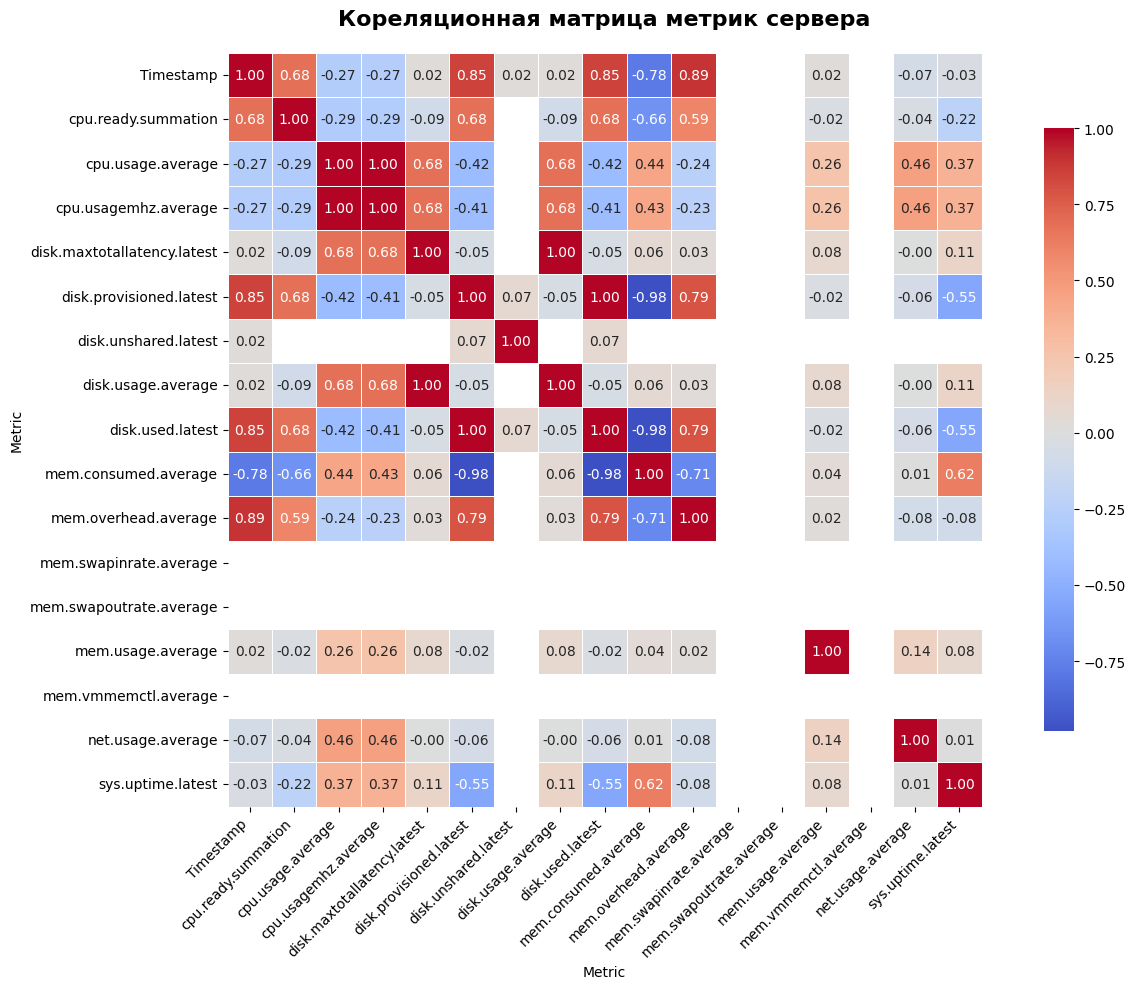

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(1)
plt.figure(figsize=(14, 10))

heatmap = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={'shrink':0.8})

plt.title('Кореляционная матрица метрик сервера', fontsize=16, fontweight='bold', pad=20)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [107]:
df1['date'] = df1['Timestamp'].dt.date
df1

Metric,Timestamp,cpu.ready.summation,cpu.usage.average,cpu.usagemhz.average,disk.maxtotallatency.latest,disk.provisioned.latest,disk.unshared.latest,disk.usage.average,disk.used.latest,mem.consumed.average,mem.overhead.average,mem.swapinrate.average,mem.swapoutrate.average,mem.usage.average,mem.vmmemctl.average,net.usage.average,sys.uptime.latest,date
0,2025-11-21 11:00:00,782.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,2883584.0,54159.0,0.0,0.0,8.76,0.0,0.0,66624.0,2025-11-21
1,2025-11-21 11:30:00,810.0,1.90,79.0,0.0,140592143.0,136314880.0,150.0,140592141.0,2915829.0,54340.0,0.0,0.0,9.19,0.0,92.0,68424.0,2025-11-21
2,2025-11-21 12:00:00,812.0,1.76,73.0,0.0,140592143.0,136314880.0,3.0,140592141.0,3222983.0,55094.0,0.0,0.0,9.52,0.0,0.0,70224.0,2025-11-21
3,2025-11-21 12:30:00,793.0,1.79,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,3223551.0,55285.0,0.0,0.0,9.04,0.0,0.0,72024.0,2025-11-21
4,2025-11-21 13:00:00,778.0,1.81,75.0,0.0,140592143.0,136314880.0,3.0,140592141.0,3223939.0,55119.0,0.0,0.0,8.74,0.0,0.0,73824.0,2025-11-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2025-11-28 07:30:00,1042.0,1.74,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,2880326.0,57288.0,0.0,0.0,8.18,0.0,0.0,233604.0,2025-11-28
330,2025-11-28 08:00:00,1252.0,1.75,73.0,0.0,140601844.0,136314880.0,2.0,140601842.0,2884527.0,57288.0,0.0,0.0,8.41,0.0,0.0,235404.0,2025-11-28
331,2025-11-28 08:30:00,1083.0,1.76,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,2874485.0,57288.0,0.0,0.0,8.92,0.0,0.0,237204.0,2025-11-28
332,2025-11-28 09:00:00,1117.0,1.75,73.0,0.0,140601844.0,136314880.0,3.0,140601842.0,2894621.0,57288.0,0.0,0.0,9.64,0.0,0.0,239004.0,2025-11-28


In [109]:
dates = df1['date'].unique()
dates

array([datetime.date(2025, 11, 21), datetime.date(2025, 11, 22),
       datetime.date(2025, 11, 23), datetime.date(2025, 11, 24),
       datetime.date(2025, 11, 25), datetime.date(2025, 11, 26),
       datetime.date(2025, 11, 27), datetime.date(2025, 11, 28)],
      dtype=object)

In [116]:
df_week = pd.DataFrame()
df_week['date'] = dates
df_week

,date
0,2025-11-21
1,2025-11-22
2,2025-11-23
3,2025-11-24
4,2025-11-25
5,2025-11-26
6,2025-11-27
7,2025-11-28


In [117]:
for metric in all_metrics:
    for date in dates:
        df_week[f'{metric}_max'] = df1[df1['date']==date][metric].max()
        df_week[f'{metric}_min'] = df1[df1['date']==date][metric].min()
        df_week[f'{metric}_avg'] = df1[df1['date']==date][metric].mean()
        df_week[f'{metric}_std'] = df1[df1['date']==date][metric].std()

In [118]:
df_week

,date,cpu.usage.average_max,cpu.usage.average_min,cpu.usage.average_avg,cpu.usage.average_std,cpu.usagemhz.average_max,cpu.usagemhz.average_min,cpu.usagemhz.average_avg,cpu.usagemhz.average_std,cpu.ready.summation_max,...,disk.used.latest_avg,disk.used.latest_std,net.usage.average_max,net.usage.average_min,net.usage.average_avg,net.usage.average_std,sys.uptime.latest_max,sys.uptime.latest_min,sys.uptime.latest_avg,sys.uptime.latest_std
0,2025-11-21,1.81,1.7,1.744,0.026833,75.0,71.0,72.7,1.080935,2850.0,...,140601842.0,0.0,0.0,0.0,0.0,0.0,240804.0,206584.0,223699.0,10654.372712
1,2025-11-22,1.81,1.7,1.744,0.026833,75.0,71.0,72.7,1.080935,2850.0,...,140601842.0,0.0,0.0,0.0,0.0,0.0,240804.0,206584.0,223699.0,10654.372712
2,2025-11-23,1.81,1.7,1.744,0.026833,75.0,71.0,72.7,1.080935,2850.0,...,140601842.0,0.0,0.0,0.0,0.0,0.0,240804.0,206584.0,223699.0,10654.372712
3,2025-11-24,1.81,1.7,1.744,0.026833,75.0,71.0,72.7,1.080935,2850.0,...,140601842.0,0.0,0.0,0.0,0.0,0.0,240804.0,206584.0,223699.0,10654.372712
4,2025-11-25,1.81,1.7,1.744,0.026833,75.0,71.0,72.7,1.080935,2850.0,...,140601842.0,0.0,0.0,0.0,0.0,0.0,240804.0,206584.0,223699.0,10654.372712
5,2025-11-26,1.81,1.7,1.744,0.026833,75.0,71.0,72.7,1.080935,2850.0,...,140601842.0,0.0,0.0,0.0,0.0,0.0,240804.0,206584.0,223699.0,10654.372712
6,2025-11-27,1.81,1.7,1.744,0.026833,75.0,71.0,72.7,1.080935,2850.0,...,140601842.0,0.0,0.0,0.0,0.0,0.0,240804.0,206584.0,223699.0,10654.372712
7,2025-11-28,1.81,1.7,1.744,0.026833,75.0,71.0,72.7,1.080935,2850.0,...,140601842.0,0.0,0.0,0.0,0.0,0.0,240804.0,206584.0,223699.0,10654.372712


In [119]:
df_week.to_excel('week_statistics.xlsx')

In [ ]:
cpu_df = pd.DataFrame(columns = ['cpu.usage.average value', 'cpu.usage.average unit', 
                                 'cpu.usagemhz.average value', 'cpu.usagemhz.average unit',
                                 'cpu.ready.summation value', 'cpu.ready.summation unit',
                                 'Date', 'Time'])

### Применение LLM модели к временным рядам

Подходы к применению LLM, использование предобученных llm как feature extractors

План начать с простого, создайте текстовое описание метрик и спользуйте эмбеддинги.

Ключевые преимущества LLM:
1. Понимание контекста: LLM могут улавливать сложные зависимости
2. Генерация объяснений: Могут объяснять почему нагрузка высокая
3. Работа с неструктурированными данными: могут анализировать логи вместе с метриками
4. Few-shot learning: могут обучаться на малом количестве примеров


Time-LLM Для анализа временных рядов.

In [122]:
# Пример пайплайна анализа нагрузки с LLM

def create_llm_based_load_analysis_pipeline(df):
    # 1. Подготовка данных
    df_prepared = prepare_time_weries_data(df)

    # 2. Cоздание текстовых описаний
    descriptions = create_metric_descriptions(df_prepared)

    # 3. Извлечение признаков через LLM
    llm_features = extract_llm_features(descriptions)

    # 4. Комбинирование с числовыми признаками
    numeric_features = extract_numeric_features(df_prepared)

    # 5. Обучение модели
    model = train_load_classifier(llm_features, numeric_features, df_prepared['load_label'])

    # 6. Генерация отчетов через LLM
    report = generate_llm_report(df_prepared, model.predictions)

    return model, report

# Statistics

In [129]:
import pandas as pd
import numpy as np

df = pd.read_csv('allMetrics.csv', sep=',')
df

,VM,Metric,Value,Unit,Timestamp,Date,Time
0,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.75,%,28.11.25 09:30:00,2025-11-28,09:30
1,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.75,%,28.11.25 09:00:00,2025-11-28,09:00
2,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.76,%,28.11.25 08:30:00,2025-11-28,08:30
3,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.75,%,28.11.25 08:00:00,2025-11-28,08:00
4,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.74,%,28.11.25 07:30:00,2025-11-28,07:30
...,...,...,...,...,...,...,...
6662,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,sys.uptime.latest,73824.00,second,21.11.25 13:00:00,2025-11-21,13:00
6663,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,sys.uptime.latest,72024.00,second,21.11.25 12:30:00,2025-11-21,12:30
6664,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,sys.uptime.latest,70224.00,second,21.11.25 12:00:00,2025-11-21,12:00
6665,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,sys.uptime.latest,68424.00,second,21.11.25 11:30:00,2025-11-21,11:30


In [130]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date
df

C:\Users\kavakosova_e\AppData\Local\Temp\ipykernel_31176\1291003588.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


,VM,Metric,Value,Unit,Timestamp,Date,Time
0,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.75,%,2025-11-28 09:30:00,2025-11-28,09:30
1,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.75,%,2025-11-28 09:00:00,2025-11-28,09:00
2,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.76,%,2025-11-28 08:30:00,2025-11-28,08:30
3,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.75,%,2025-11-28 08:00:00,2025-11-28,08:00
4,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,cpu.usage.average,1.74,%,2025-11-28 07:30:00,2025-11-28,07:30
...,...,...,...,...,...,...,...
6662,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,sys.uptime.latest,73824.00,second,2025-11-21 13:00:00,2025-11-21,13:00
6663,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,sys.uptime.latest,72024.00,second,2025-11-21 12:30:00,2025-11-21,12:30
6664,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,sys.uptime.latest,70224.00,second,2025-11-21 12:00:00,2025-11-21,12:00
6665,dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by,sys.uptime.latest,68424.00,second,2025-11-21 11:30:00,2025-11-21,11:30


In [131]:
dates = df['Date'].unique()
all_metrics = df['Metric'].unique()

In [145]:
def process_date(df, date, metric):
    df_date = df[df['Date']==date]
    values = df_date[df_date['Metric']==metric]['Value']
    date_min = values.min()
    date_max = values.max()
    date_avg = values.sum() / len(values)
    return [date, metric, date_min, date_max, date_avg]

In [146]:
res = pd.DataFrame(columns=['date', 'metric', 'min_value', 'max_value', 'avg_value'])

In [147]:
for date in dates:
    for metric in metrics:
        row = process_date(df, date, metric)
        res.loc[len(res)] = row

In [148]:
res

,date,metric,min_value,max_value,avg_value
0,2025-11-28,cpu.usage.average,1.7,1.810000e+00,1.744000e+00
1,2025-11-28,cpu.usagemhz.average,71.0,7.500000e+01,7.270000e+01
2,2025-11-28,cpu.ready.summation,1042.0,2.850000e+03,1.289750e+03
3,2025-11-28,mem.consumed.average,2874485.0,2.907536e+06,2.890747e+06
4,2025-11-28,mem.overhead.average,57288.0,5.728800e+04,5.728800e+04
...,...,...,...,...,...
123,2025-11-21,disk.unshared.latest,136314880.0,1.363149e+08,1.363149e+08
124,2025-11-21,disk.usage.average,2.0,1.500000e+02,8.730769e+00
125,2025-11-21,disk.used.latest,0.0,1.405921e+08,5.623686e+07
126,2025-11-21,net.usage.average,0.0,9.200000e+01,3.538462e+00


In [149]:
res.to_excel('result.xlsx')

# Все серверы

In [164]:
folder_path = 'C:\\Users\\kavakosova_e\\Desktop\\Arina\\Servers\\all_servers\\temp'

In [165]:
import os
from typing import List

def list_files_in_folder(folder_path: str) -> List[str]:
    """
    Lists all files and directories in the specified directory.
    This doesn't include files in subdirectories.
    """
    try:
        entries = os.listdir(folder_path)
        files = [entry for entry in entries if os.path.isfile(os.path.join(folder_path, entry))]
        return files
    except FileNotFoundError:
        print(f"Error: Directory '{folder_path}' not found.")
        return []
    except Exception as e:
        print(f"Ann error occured: {e}")
        return []

In [177]:
filenames = list_files_in_folder(folder_path)

In [169]:
file_name = "all_filenames.txt"

with open(file_name, 'w') as file:
    for f in filenames:
        file.write(f + '\n')

In [170]:
def read_file_to_list(filename):
    lines = []
    with open(filename, 'r') as file:
        for line in file:
            lines.append(line.strip())
    return lines

In [174]:
all_servers = read_file_to_list('C:\\Users\\kavakosova_e\\Desktop\\Arina\\Servers\\all_servers.txt')
all_servers

['metrics_DataLake-DBN1',
 'metrics_DataLake-DBN2',
 'metrics_DataLake-STBY',
 'metrics_dwh1-nfs.k8s-ift-dwh1.sigma-belpsb.by',
 'metrics_ELK-Prom1-hot3',
 'metrics_ELK-Prom1-lgsh2',
 'metrics_ELK-Prom1-ngnx1',
 'metrics_IWTM-PA2',
 'metrics_k8s-prom2-wrk4.k8s-prom2.belpsb.by',
 'metrics_k8s-prom2-wrk6.k8s-prom2.belpsb.by',
 'metrics_k8s-prom2-wrk9.k8s-prom2.belpsb.by',
 'metrics_k8s-proxy-prom.sigma-belpsb.by',
 'metrics_k8s-psi1-wrkr1.k8s-psi1.belpsb.by',
 'metrics_k8s-psi1-wrkr2.k8s-psi1.belpsb.by',
 'metrics_ntmaster-psi',
 'metrics_ocp-lb2.ocp-ift2.sigma-belpsb.by',
 'metrics_site-web-dmz',
 'metrics_test489',
 'metrics_VSA-Apollo1',
 'metrics_VSA-Lenovo1']

In [197]:
all_dates = read_file_to_list('C:\\Users\\kavakosova_e\\Desktop\\Arina\\Servers\\all_dates.txt')
all_dates

['2025-11-25',
 '2025-11-26',
 '2025-11-27',
 '2025-11-28',
 '2025-11-29',
 '2025-11-30',
 '2025-12-01']

In [198]:
all_metrics

array(['cpu.usage.average', 'cpu.usagemhz.average', 'cpu.ready.summation',
       'mem.consumed.average', 'mem.overhead.average',
       'mem.swapinrate.average', 'mem.swapoutrate.average',
       'mem.usage.average', 'mem.vmmemctl.average',
       'disk.maxtotallatency.latest', 'disk.provisioned.latest',
       'disk.unshared.latest', 'disk.usage.average', 'disk.used.latest',
       'net.usage.average', 'sys.uptime.latest'], dtype=object)

In [199]:
folder_path = 'C:\\Users\\kavakosova_e\\Desktop\\Arina\\Servers\\all_servers\\temp\\'

In [200]:
def calculate_metrics(date: str, vm: str, metric: str):
    """
    Calculates statistic for metric for the date and vm
    :returns: [vm, date, metric, max_value, min_value, avg_value]
    """
    data_filename = f"{vm}_{date}.csv"
    data = pd.read_csv(folder_path + data_filename)
    values = data[data['Metric']==metric]['Value']
    value_max = values.max()
    value_min = values.min()
    value_avg = values.sum() / len(values)
    return [vm, date, metric, value_max, value_min, value_avg]

In [201]:
calculate_metrics(all_dates[0], all_servers[0], all_metrics[0])

['metrics_DataLake-DBN1',
 '2025-11-25',
 'cpu.usage.average',
 np.float64(5.11),
 np.float64(4.48),
 np.float64(4.6814285714285715)]

In [202]:
result = pd.DataFrame(columns=[
    'vm',
    'date',
    'metric',
    'max_value',
    'min_value',
    'avg_value'
])

In [206]:
from tqdm import tqdm 

for server in tqdm(all_servers):
    for metric in all_metrics:
        for date in all_dates:
            row = calculate_metrics(date, server, metric)
            result.loc[len(result)] = row

result

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.80it/s]


,vm,date,metric,max_value,min_value,avg_value
0,metrics_DataLake-DBN1,2025-11-25,cpu.usage.average,5.11,4.48,4.681429e+00
1,metrics_DataLake-DBN1,2025-11-26,cpu.usage.average,4.91,4.24,4.629792e+00
2,metrics_DataLake-DBN1,2025-11-27,cpu.usage.average,5.08,4.42,4.755208e+00
3,metrics_DataLake-DBN1,2025-11-28,cpu.usage.average,5.23,4.71,4.905417e+00
4,metrics_DataLake-DBN1,2025-11-29,cpu.usage.average,5.32,4.84,5.033542e+00
...,...,...,...,...,...,...
5624,metrics_VSA-Lenovo1,2025-11-27,sys.uptime.latest,34424204.00,34339603.00,3.438190e+07
5625,metrics_VSA-Lenovo1,2025-11-28,sys.uptime.latest,34510605.00,34426004.00,3.446830e+07
5626,metrics_VSA-Lenovo1,2025-11-29,sys.uptime.latest,34597006.00,34512405.00,3.455470e+07
5627,metrics_VSA-Lenovo1,2025-11-30,sys.uptime.latest,34683407.00,34598806.00,3.464111e+07


In [207]:
result.to_excel('statistics_for_all_servers.xlsx')